In [ ]:
#importing all the required libraries
import numpy as np
import operator
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#loading the file from Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#changing the directory to the location of the file.
os.chdir('/content/drive/Shared drives/MAJOR RESEARCH PROJECT/PROBLEM STATEMENT AND DATASET')

In [ ]:
filename = 'cardiovascular.csv' #setting the file name to a variable.

In [ ]:
df = pd.read_csv(filename) #reading the csv file in to a dataframe.

In [ ]:
df.head(2).transpose() #viewing the first two rows in the dataset in transpose view

,0,1
id,0.0,1.0
age,18393.0,20228.0
gender,2.0,1.0
height,168.0,156.0
weight,62.0,85.0
ap_hi,110.0,140.0
ap_lo,80.0,90.0
cholesterol,1.0,3.0
gluc,1.0,1.0
smoke,0.0,0.0


In [ ]:
y = df['cardio'] #target feature in the dataset to variable y

In [ ]:
to_drop = ['id'] #loading the features to drop in to a dataset
df.drop(to_drop, inplace=True, axis=1)


In [ ]:
#checking for any null values
df.isnull().sum()


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#find columns with null values
is_NaN_cells =  df.isnull()
columns_has_NaN = is_NaN_cells.any(axis=0)
columns_with_NaN =df[[col for col,value in columns_has_NaN.items() if value == True]]

print(columns_with_NaN)


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[70000 rows x 0 columns]


In [ ]:
#find rows with Null Values
is_NaN_cells =  df.isnull()
row_has_NaN = is_NaN_cells.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)


Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [ ]:
# Any missing values
print(df.isnull().values.any())

False


In [ ]:
df.columns #checking the columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
df.shape #shape before dropping the duplicates

(70000, 12)

In [ ]:
df.drop_duplicates(inplace=True) # dropping the duplicates in the dataset

In [ ]:
df.shape #shape after dropping the duplicates

(69976, 12)

In [ ]:
df.dropna(thresh=int(df.shape[0] * .9), axis=1) #drop any thing with 90% of mising values.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#Normalising the data
df['age'] = df['age']/365
np.round(df['age'],2)
df['height'] = df['height']/100
np.round(df['height'],2)

0        1.68
1        1.56
2        1.65
3        1.69
4        1.56
         ... 
69995    1.68
69996    1.58
69997    1.83
69998    1.63
69999    1.70
Name: height, Length: 69976, dtype: float64

In [ ]:
to_drop = ['age','gender'] #loading the features to drop in to a dataset
df.drop(to_drop, inplace=True, axis=1)

# Experimentation and Results 

In [ ]:
#Imports
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns

In [ ]:
vif.round(1)

,VIF Factor,features
0,37.6,height
1,31.8,weight
2,1.7,ap_hi
3,1.3,ap_lo
4,6.6,cholesterol
5,7.0,gluc
6,1.2,smoke
7,1.2,alco
8,5.1,active
9,2.2,cardio


From the above it is clear that no feature is having same VIF value and so we need not drop any feature.

https://etav.github.io/python/vif_factor_python.html

# Naive Bayes with Laplace Smoothing 

In [ ]:
def Naive_Bayes (train_set, test_set):
    
    from sklearn.utils import shuffle
    train_set = shuffle(train_set)
    test_set  = shuffle(test_set)
    
    no_of_features = train_set.shape[1]
    X = train_set.iloc[:,0:(no_of_features-1)]#dropping the class 
    Y = train_set.iloc[:,(no_of_features-1)]# taking only class labels column
    X_test = test_set.iloc[:,0:(no_of_features-1)]# dropping the class for test set
    Y_test = test_set.iloc[:,(no_of_features-1)]# taking only class labels column
    
    
    Y_prob = {}
    Y_count = {}
    Y_unique = np.unique(Y)
    K = len(Y_unique)
    lambd = 1
    Y_len = len(Y)
    for C in range(len(Y_unique)):
        Y_prob[Y_unique[C]] = (sum (Y == Y_unique[C]) + K)/ (Y_len + K*lambd) #applied laplace smmothing on prior probability
        Y_count[Y_unique[C]] = sum (Y == Y_unique[C])
    
    prob_table = {}
    for no_feature in range(X.shape[1]):
        s = 'Column_{}'.format(X.columns.values[no_feature])
        if (X.iloc[:,no_feature].dtypes != 'float64'):                                      # categorical
            X_unique = np.unique(X.iloc[:,no_feature])
            prob_table[s] = pd.DataFrame(0.00, index= X_unique, columns= Y_unique)          # create empty dataframe
            for i in range(len(X_unique)):
                for j in range(len(Y_unique)):                       #laplace smoothing on conditional probability
                    prob_table[s].iloc[i,j] = (sum(X[Y==Y_unique[j]].iloc[:,no_feature] == X_unique[i])+lambd) / (Y_count[Y_unique[j]]+lambd*len(X_unique))
    
    # prediction
    test_nrow = X_test.shape [0]
    test_ncol = X_test.shape [1]
    
    ## creating an empty dataframe for prediction
   
    pred_table = pd.DataFrame(0.00, index= range(len(X_test)), columns = np.append(Y_unique,"Final_pred")) 
    pred_table["Final_pred"] = pred_table["Final_pred"].astype(Y.dtypes)           # same type as output
    posterior = list()
    
    for i in range(test_nrow):
        pred = {}
        first_time = True
        for j in range(test_ncol):
            if (X.iloc[:,j].dtypes != 'float64'):                                          # categorical column
                s = 'Column_{}'.format(X_test.columns.values[j])
                for C in range(len(Y_unique)):
                    try:
                        temp = prob_table[s].loc[X_test.iloc[i,j]][C]
                    except:
                        pass
                    if first_time: 
                        pred[C] = temp
                    else:
                        pred[C] = pred[C] * temp
                first_time = False
            
            else:                                                                          # numerical column
                for C in range(len(Y_unique)):
                    filtered = X[Y==Y_unique[C]].iloc[:,j]
                    mean_filtered = np.mean(filtered)
                    var_filtered = np.std(filtered)**2
                    temp = 1 / (2*np.pi*var_filtered)**(0.5) * np.exp (-(X_test.iloc[i,j] - mean_filtered)**2 / (2*var_filtered))
                    if first_time: 
                        pred [C] = temp
                    else:
                        pred [C] = pred[C] * temp
                first_time = False
                    
        for C in range(len(Y_unique)):
            pred[C] = pred[C] * Y_prob[Y_unique[C]]
        
        denom = sum(pred.values())
        
        for C in range(len(Y_unique)):
            pred[C] = pred[C] / denom
            
        posterior.append(pred[max(pred, key = pred.get)])
            
        for C in range(len(Y_unique)):
            pred_table.iloc[i,C] = round(pred[C],3)
            
        pred_table.iloc[i, pred_table.columns.get_loc("Final_pred")] = pred_table.iloc[i,0:2].astype('float64').idxmax()
        
    pred_table["True_labels"] = Y_test.values
    pred_table["Posterior_Probability"] = posterior
    
    output = pred_table[['Final_pred','True_labels','Posterior_Probability']]
    correct_count = sum(pred_table["Final_pred"].values == Y_test)
    summ=0
    for i in range(len(pred_table["Final_pred"])):
        if(int(pred_table["Final_pred"][i]) == int(pred_table["True_labels"][i])):
            summ= summ+1
    accuracy = summ / len(Y_test)
    #print("accuracy =", round(accuracy,3))
    
    return (output,round(accuracy,3))

In [ ]:
train_set = df[0:50000]
test_set = df[50000:]

In [ ]:
output,accuracy = Naive_Bayes (train_set, test_set)
acc_lst = []
acc_lst.append(accuracy)

In [ ]:
print("The accuracy of the naive bayes model with Laplace smoothing  "+str(accuracy))

The accuracy of the naive bayes model with Laplace smoothing  0.718


# Gaussian Naive Bayes 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

In [ ]:
y = df["cardio"]
df_bckup = df
X = df.drop(['cardio'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Model Implementation Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
test_preds= gnb.predict(X_test)
print("Accuracy on test data with Guassian Naive Bayes",accuracy_score(test_preds,y_test))
acc_lst.append(accuracy_score(test_preds,y_test))

Accuracy on test data with Guassian Naive Bayes 0.5749361278309444


# Confusion Matrix Gaussian Naive Bayes

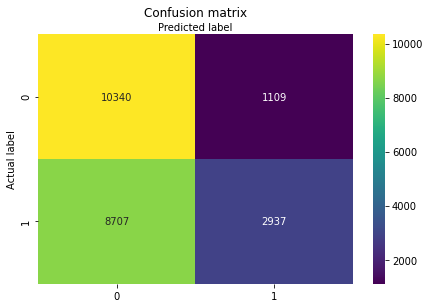

In [ ]:
 from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, test_preds)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Precsion and Recall Values Gaussian NB

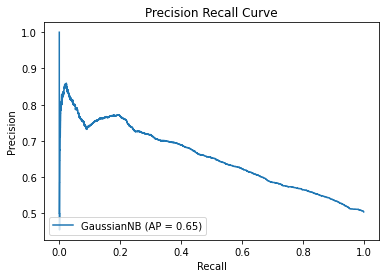

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
disp = plot_precision_recall_curve(gnb, X_test, y_test)
plt.title("Precision Recall Curve");

In [ ]:
!pip install plot_metric

# RECEIVER OPERATING CHARACTERSTIC CURVE PLOT

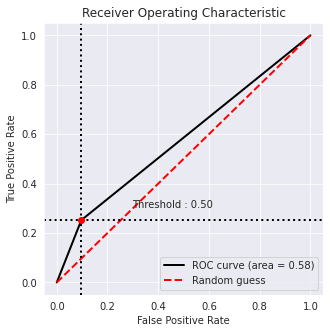

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, test_preds, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

# Logistic Regression


Ignore Warnings 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

# Model Implementation Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgrclf = LogisticRegression(random_state=0).fit(X_train, y_train)
test_preds= lgrclf.predict(X_test)
print("Accuracy on test data with Logistic Regression",accuracy_score(test_preds,y_test))
acc_lst.append(accuracy_score(test_preds,y_test))

Accuracy on test data with Logistic Regression 0.716667388386091


# Confusion Matrix Logistic Regression

Text(0.5, 257.44, 'Predicted label')

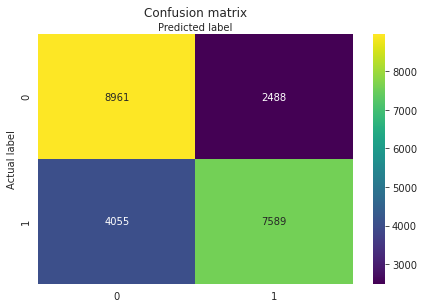

In [ ]:
 cnf_matrix = confusion_matrix(y_test, test_preds)
 class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

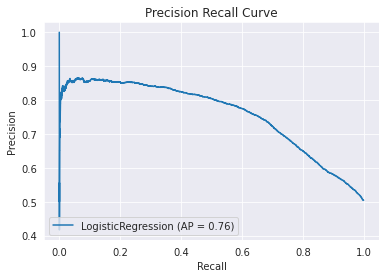

In [ ]:
disp = plot_precision_recall_curve(lgrclf, X_test, y_test)
plt.title("Precision Recall Curve");

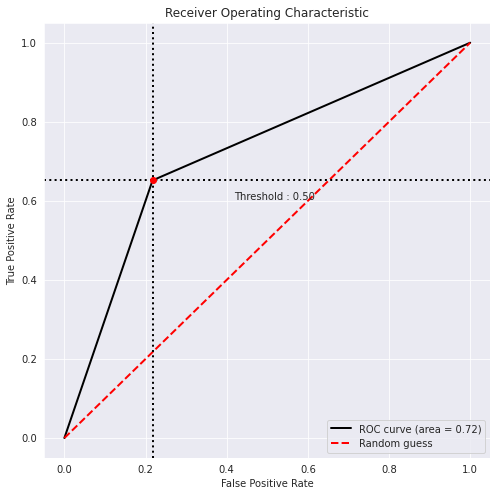

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, test_preds, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Experimening With all The Solvers in Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  liblinear 0.722
  newton-cg 0.722
  lbfgs 0.718
  sag 0.520
  saga 0.515


In [ ]:
accuracy_liblinear = 0.72
acc_lst.append(accuracy_liblinear)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

#Support Vector Machine with Linear Kernel

In [ ]:
from sklearn import svm
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train)
test_preds= svc.predict(X_test)
print("Accuracy on test data with Support vector machine",accuracy_score(test_preds,y_test))
acc_lst.append(accuracy_score(test_preds,y_test))

Accuracy on test data with Support vector machine 0.6169835014939592


# Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

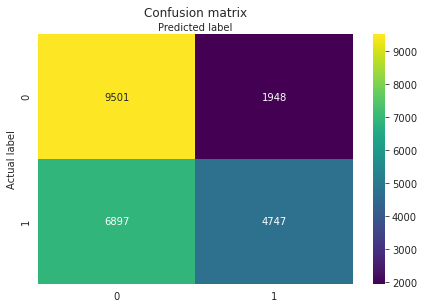

In [ ]:
cnf_matrix = confusion_matrix(y_test, test_preds)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Precision Recall Curve

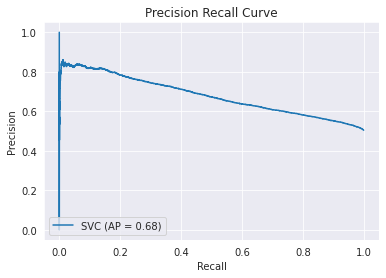

In [ ]:
disp = plot_precision_recall_curve(svc, X_test, y_test)
plt.title("Precision Recall Curve");

# ROC curve 

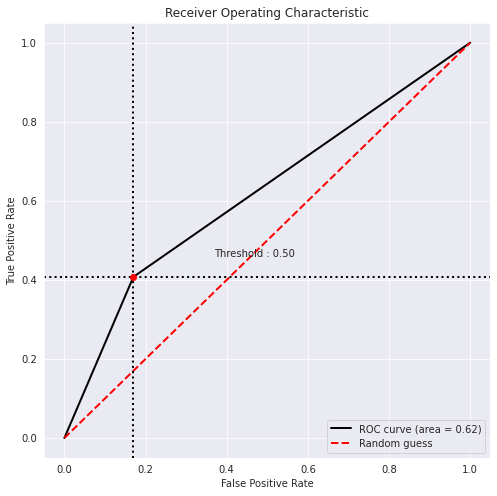

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, test_preds, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Support Vector Machine with radial basis function kernel

In [ ]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X_train, y_train)
test_preds= svc.predict(X_test)
print("Accuracy on test data with Support vector machine",accuracy_score(test_preds,y_test))
acc_lst.append(accuracy_score(test_preds,y_test))

Accuracy on test data with Support vector machine 0.6052050404884597


# Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

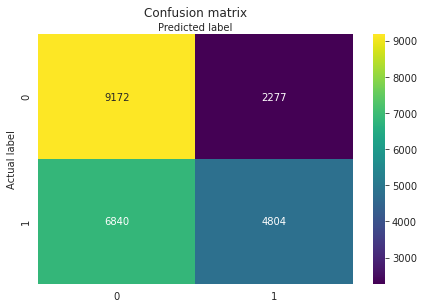

In [ ]:
cnf_matrix = confusion_matrix(y_test, test_preds)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Precision Recall curve

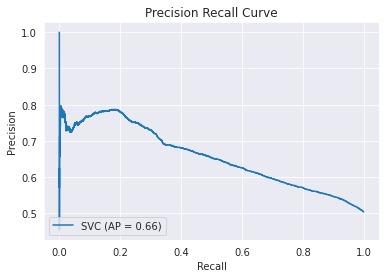

In [ ]:
disp = plot_precision_recall_curve(svc, X_test, y_test)
plt.title("Precision Recall Curve");

# ROC Curve

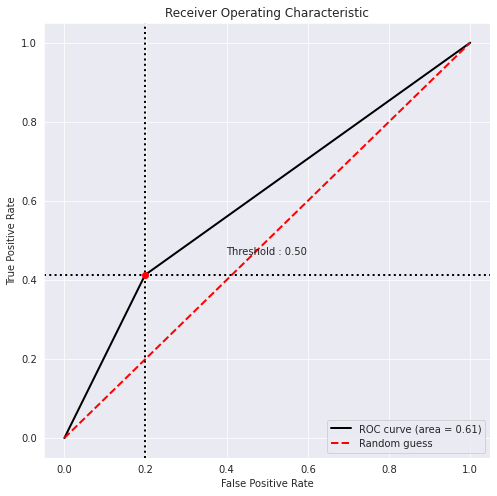

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, test_preds, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Experimenting with Tree algorithms

In [ ]:
from sklearn import tree
dtclf = tree.DecisionTreeClassifier()
dtclf = dtclf.fit(X_train,y_train)
test_preds= dtclf.predict(X_test)
print("Accuracy on test data with Decision Tree classifier",accuracy_score(test_preds,y_test))
acc_lst.append(accuracy_score(test_preds,y_test))

Accuracy on test data with Decision Tree classifier 0.6459100160221712


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_depth=2, random_state=0)
rfclf.fit(X_train, y_train)
test_preds= rfclf.predict(X_test)
print("Accuracy on test data with Random Forest classifier",accuracy_score(test_preds,y_test))
acc_lst.append(accuracy_score(test_preds,y_test))

Accuracy on test data with Random Forest classifier 0.7154115965877106


In [ ]:
confusion_matrix(y_test,test_preds)

array([[9032, 2417],
       [4155, 7489]])

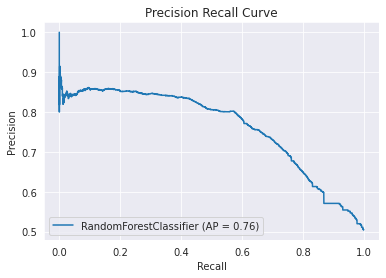

In [ ]:
disp = plot_precision_recall_curve(rfclf, X_test, y_test)
plt.title("Precision Recall Curve");

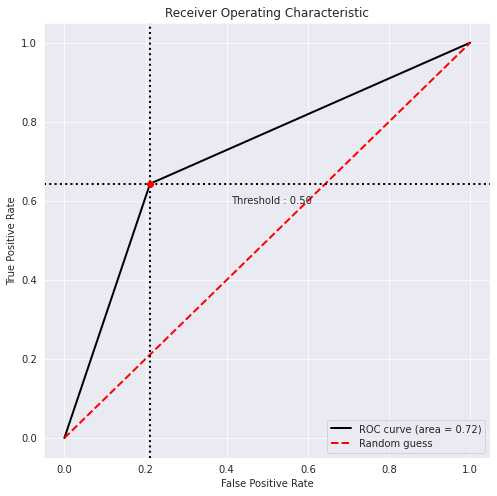

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, test_preds, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Combining Multiple Learners -Ensemble Learning

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
	estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],
	voting = 'hard')
voting_clf.fit(X_train, y_train)
test_preds= voting_clf.predict(X_test)
print("Accuracy on test data with Random Forest classifier",accuracy_score(test_preds,y_test))
acc_lst.append(accuracy_score(test_preds,y_test))

Accuracy on test data with Random Forest classifier 0.6338284328584419


# Precision Recall Curve

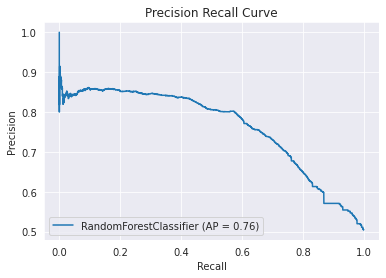

In [ ]:
disp = plot_precision_recall_curve(rfclf, X_test, y_test)
plt.title("Precision Recall Curve");


# Receiver Operating Characteristic Curve 

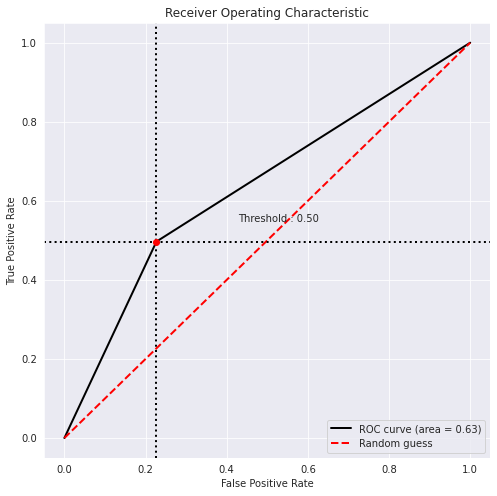

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, test_preds, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Checking with Bagging Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print("Accuracy on test data with Random Forest classifier",accuracy_score(y_pred_rf,y_test))
acc_lst.append(accuracy_score(y_pred_rf,y_test))

Accuracy on test data with Random Forest classifier 0.7261507816221365


# Checking with AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = rnd_clf.predict(X_test)
print("Accuracy on test data with Adaboost classifier",accuracy_score(y_pred_ada,y_test))
acc_lst.append(accuracy_score(y_pred_ada,y_test))

Accuracy on test data with Adaboost classifier 0.7261507816221365


# Checking with GradientBoostRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gbrt = rnd_clf.predict(X_test)
print("Accuracy on test data with Gradient Boosting classifier",accuracy_score(y_pred_gbrt,y_test))
acc_lst.append(accuracy_score(y_pred_gbrt,y_test))

Accuracy on test data with Gradient Boosting classifier 0.7261507816221365


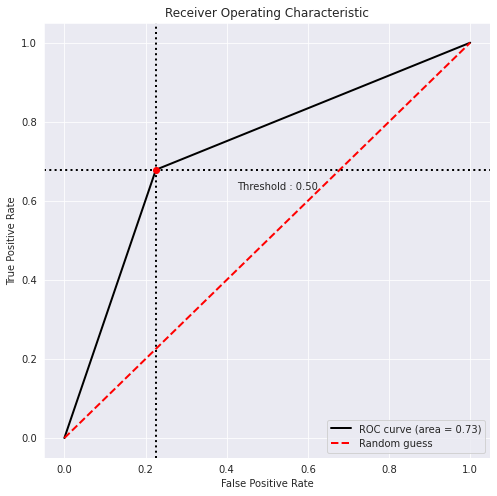

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_gbrt, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

# Comparing The Performance

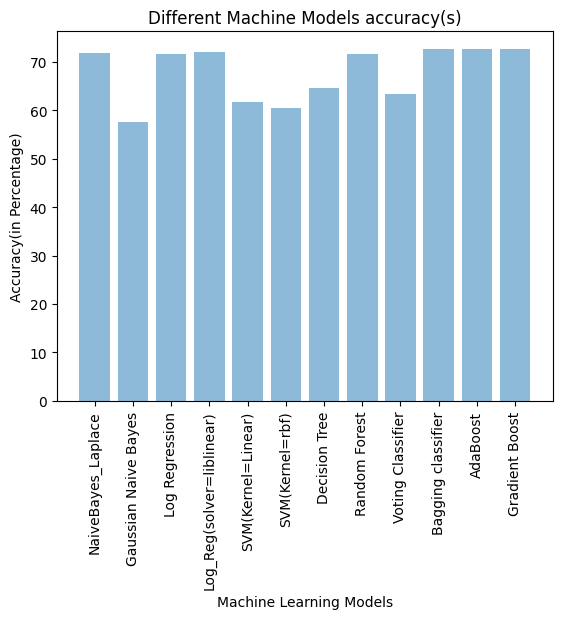

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

Algorithm = ('NaiveBayes_Laplace', 'Gaussian Naive Bayes', 'Log Regression', 'Log_Reg(solver=liblinear)','SVM(Kernel=Linear)','SVM(Kernel=rbf)','Decision Tree','Random Forest','Voting Classifier','Bagging classifier','AdaBoost','Gradient Boost')
y_pos = np.arange(len(acc_lst))
acc_lst = [i * 100 for i in acc_lst] 
plt.bar(y_pos,acc_lst, align='center', alpha=0.5)
plt.xticks(y_pos, Algorithm,rotation=90)
plt.ylabel('Accuracy(in Percentage)')
plt.title('Different Machine Models accuracy(s)')
plt.xlabel('Machine Learning Models')
plt.show()